In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [2]:
# read train and test data
train = pd.read_csv(r'aug_train.csv')
test = pd.read_csv(r'aug_test.csv')

In [3]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


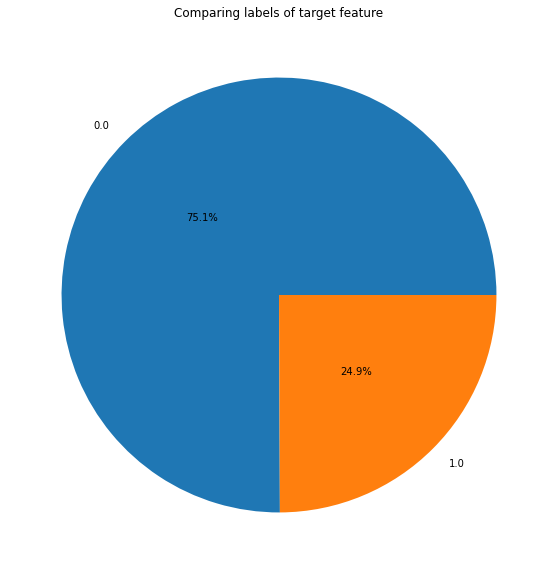

In [6]:
# unbalaance datasetlerde outlier bakarsak, aslında outlier olmayan değerler outliear gibi gözükeiblir. Bu yüzden daha sonradan gözlemleyeceğiz.
# First Check weather our dataset is balanced or not?
values = train['target'].value_counts().values.tolist()
labels = train['target'].value_counts().index
plt.figure(figsize= (10,10))
plt.title('Comparing labels of target feature')
plt.pie(x = values, labels = labels, autopct='%1.1f%%', pctdistance= .5)
plt.show()

<AxesSubplot:>

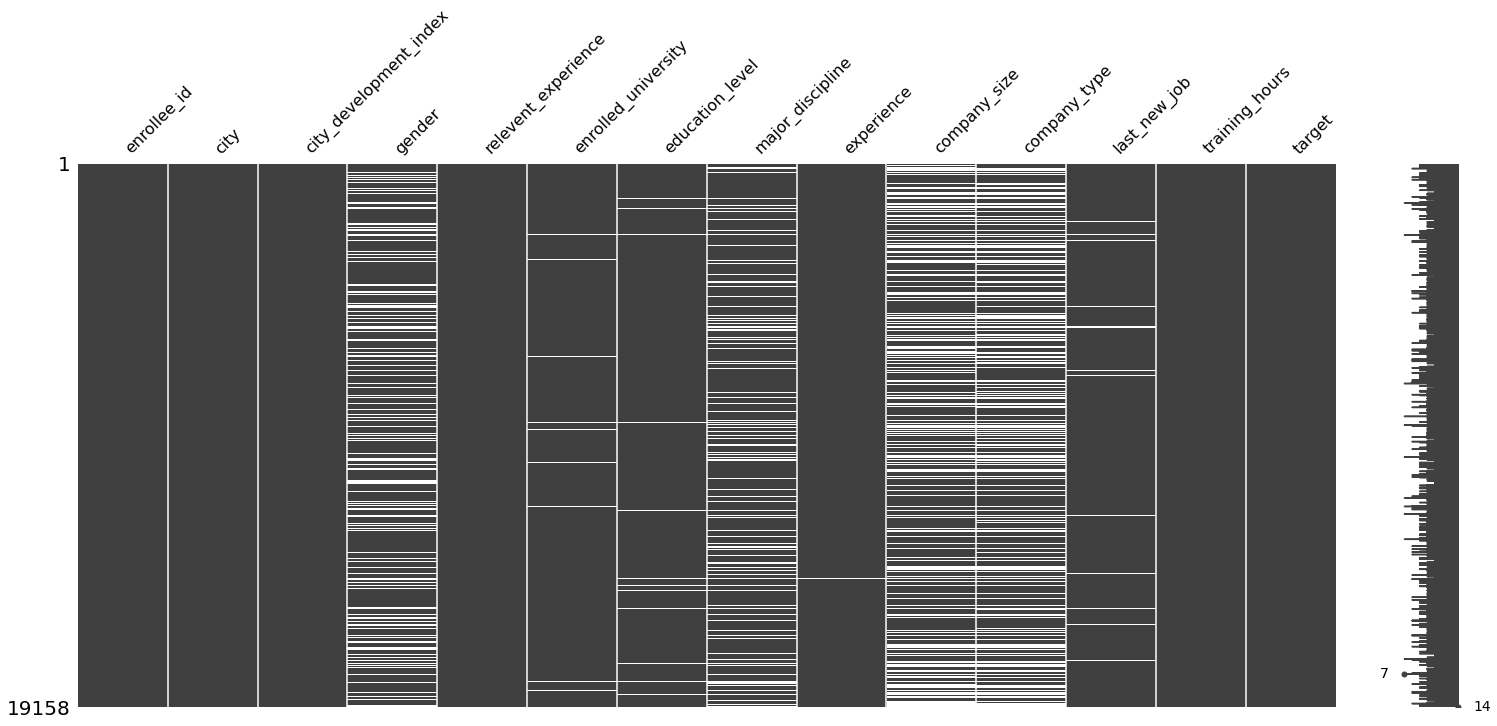

In [7]:
msno.matrix(train)

In [8]:
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


<AxesSubplot:>

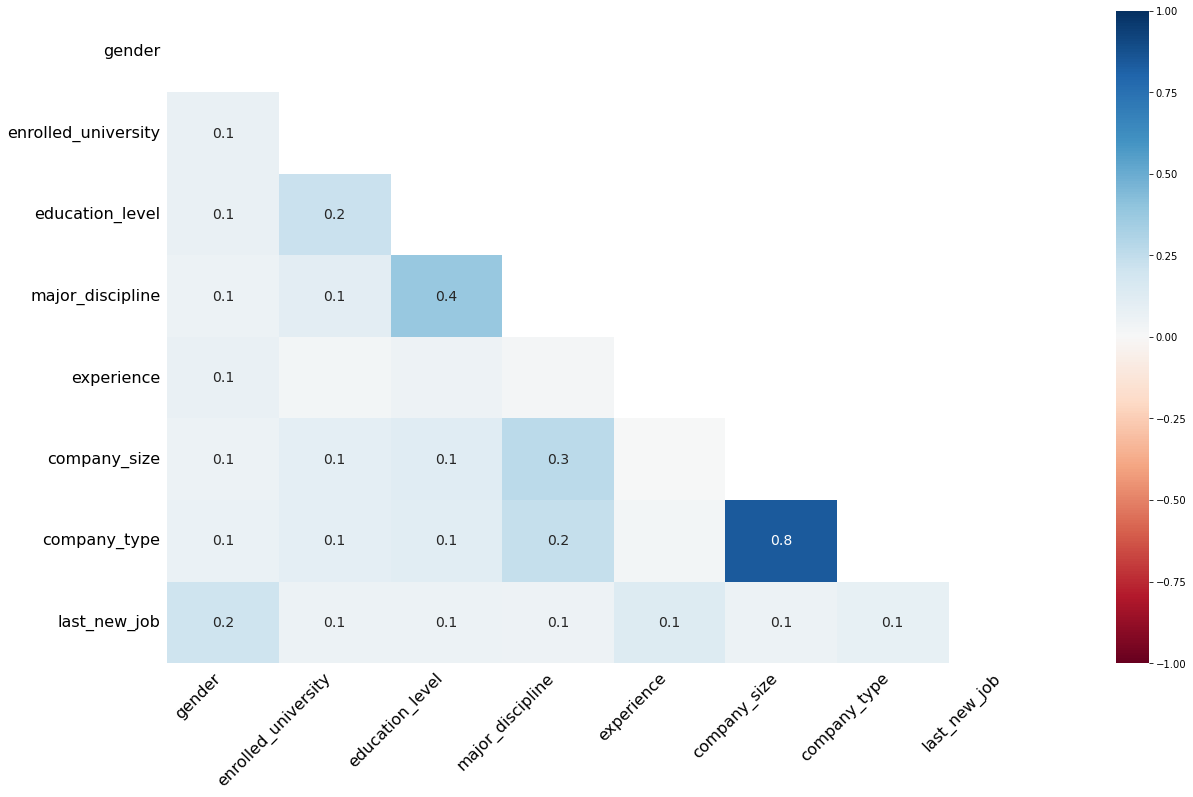

In [9]:
msno.heatmap(train)

<AxesSubplot:>

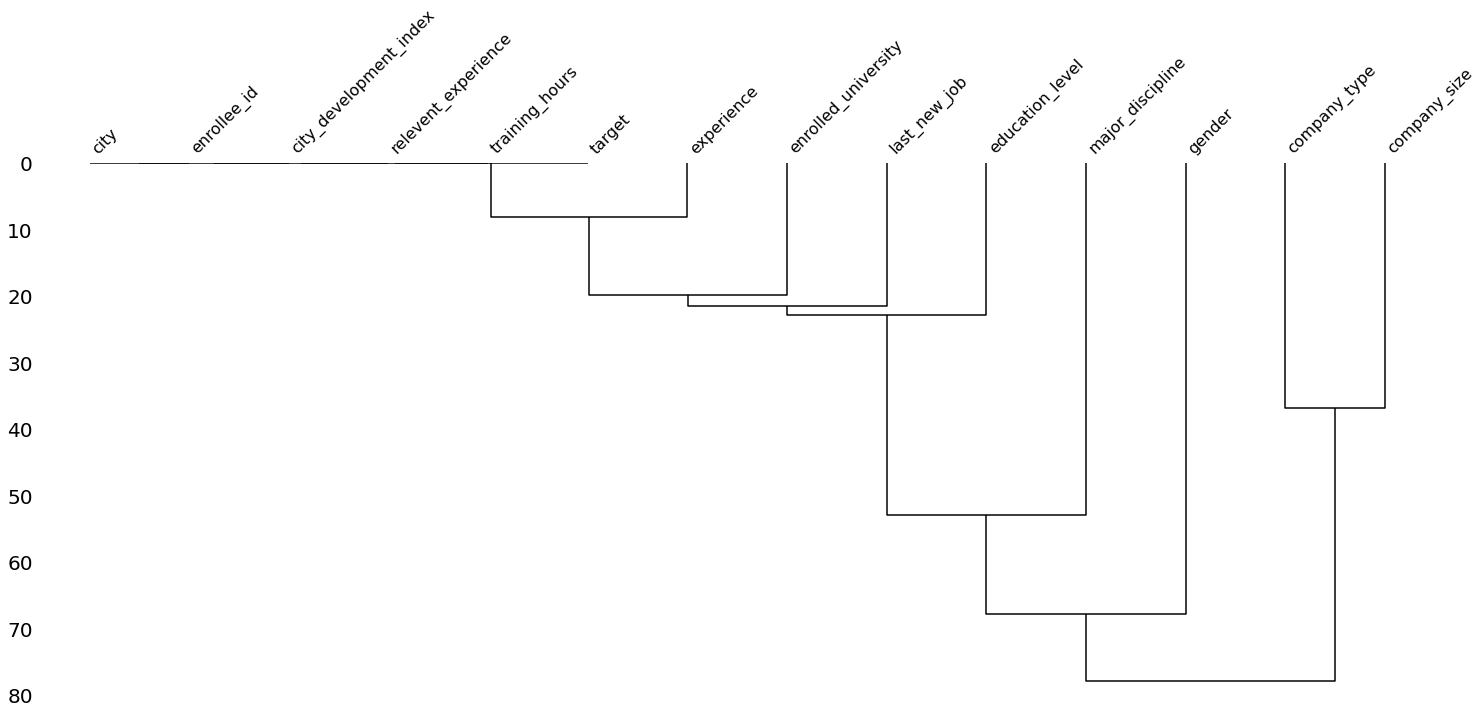

In [10]:
msno.dendrogram(train)

In [11]:
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [12]:
# null count
train.isnull().sum()

# fill na values with 9999
train2 = train.fillna(9999, inplace=False)

# null count
train2.isnull().sum()




enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [13]:
train2.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        4
relevent_experience           2
enrolled_university           4
education_level               6
major_discipline              7
experience                   23
company_size                  9
company_type                  7
last_new_job                  7
training_hours              241
target                        2
dtype: int64

In [14]:
#Let's have a look of missing value
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({#'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,percent_missing
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [15]:
tr0 = train2[train2.target == 0]
tr1 = train2[train2.target == 1]

tr0_a = tr0.groupby(["city"]).agg({"enrollee_id":"count"}).sort_values(by="enrollee_id",ascending=False).reset_index()
tr0_a.columns = ["city","0_count"]

tr1_a = tr1.groupby(["city"]).agg({"enrollee_id":"count"}).sort_values(by="enrollee_id",ascending=False).reset_index()
tr1_a.columns = ["city","1_count"]
tr1_a

tr2 = tr0_a.merge(tr1_a, how="left", on="city")

tr2["sum"] = tr2["0_count"] + tr2["1_count"]
tr2["rate"] = tr2["1_count"] / tr2["sum"]
tr2 = tr2.fillna(0)
tr2 = tr2.sort_values(by="sum", ascending=False).reset_index()
tr2
tr2['cumsum_rate'] = tr2["sum"].cumsum() / tr2["sum"].sum()
print(tr2[tr2.cumsum_rate >= 0.8].index[0] / len(tr2.cumsum_rate))

0.18032786885245902


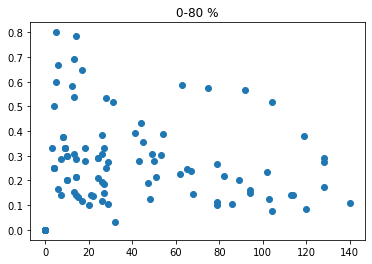

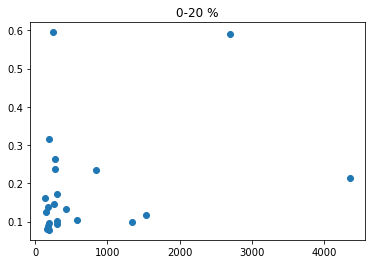

In [16]:
tr3 = tr2[tr2.cumsum_rate >= 0.8]
plt.scatter(tr3["sum"], tr3["rate"])
plt.title("0-80 %")
plt.show()

tr4 = tr2[tr2.cumsum_rate < 0.8]
plt.scatter(tr4["sum"], tr4["rate"])
plt.title("0-20 %")
plt.show()

In [17]:
# split train2 data according to 
tr2

,index,city,0_count,1_count,sum,rate,cumsum_rate
0,0,city_103,3427,928.0,4355.0,0.213088,0.227784
1,3,city_21,1105,1597.0,2702.0,0.591044,0.369109
2,1,city_16,1354,179.0,1533.0,0.116765,0.449291
3,2,city_114,1203,133.0,1336.0,0.099551,0.519169
4,4,city_160,646,199.0,845.0,0.235503,0.563366
...,...,...,...,...,...,...,...
117,115,city_129,3,0.0,0.0,0.000000,1.000000
118,92,city_2,7,0.0,0.0,0.000000,1.000000
119,102,city_62,5,0.0,0.0,0.000000,1.000000
120,120,city_140,1,0.0,0.0,0.000000,1.000000


In [18]:
# train2["city_cat"] = "Null"
# for i in range(len(train2.enrollee_id)):
#     if i <= 40:
#         train2["city_cat"].iloc[i] = "Group_1"
#     elif i > 40 and i <= 140:
#         train2["city_cat"].iloc[i] = "Group_2"
#     elif i > 140 and i < 2000:
#         train2["city_cat"].iloc[i] = "Group_3"
#     elif i >= 2000:
#         train2["city_cat"].iloc[i] = "Group_4"
#     else:
#         train2["city_cat"].iloc[i] = "HATA"

In [19]:
train2.experience.drop_duplicates()

0       >20
1        15
2         5
3        <1
5        11
7        13
8         7
9        17
10        2
15       16
16        1
19        4
22       10
26       14
29       18
31       19
34       12
39        3
42        6
43        9
100       8
133      20
135    9999
Name: experience, dtype: object

c:\Users\batuhan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\batuhan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


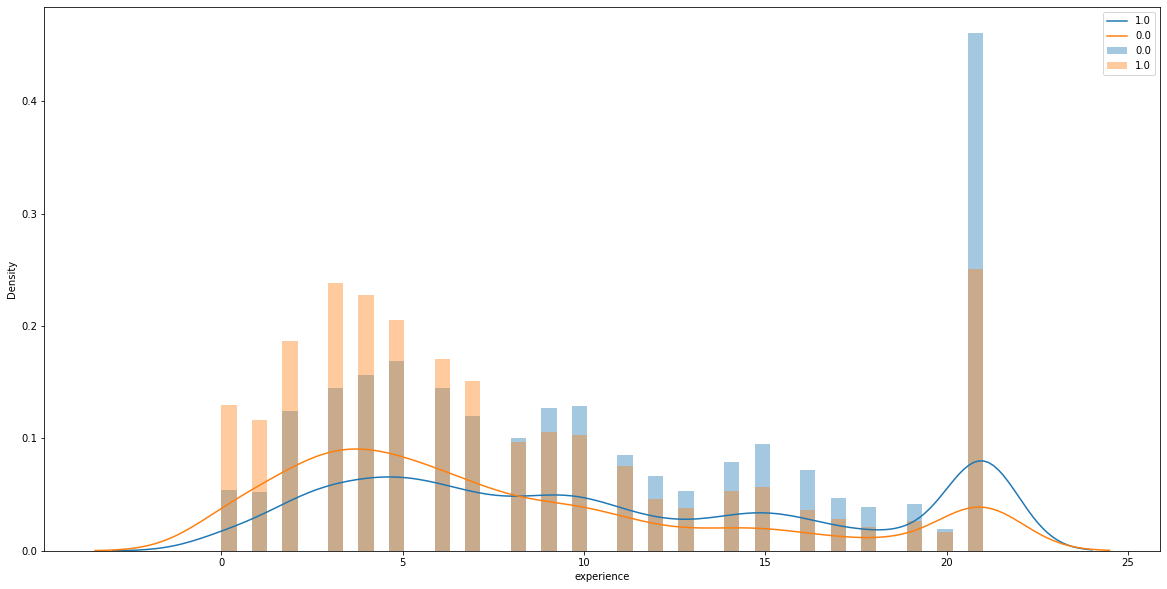

In [20]:

def replace(experience):
    if experience == '>20':
        return 21
    elif experience == '<1':
        return 0
    elif experience == "9999":
        return 0.1
    else:
        return experience
train2.experience = train2.experience.map(replace).astype(float)
train2.experience = train2.experience.replace(9999,0.1)
plt.figure(figsize= (20,10))
sns.distplot(train2[train2.target == 0].experience, bins = 50)
sns.distplot(train2[train2.target == 1].experience, bins = 50)

plt.legend(train2.target)

plt.show()

c:\Users\batuhan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\batuhan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


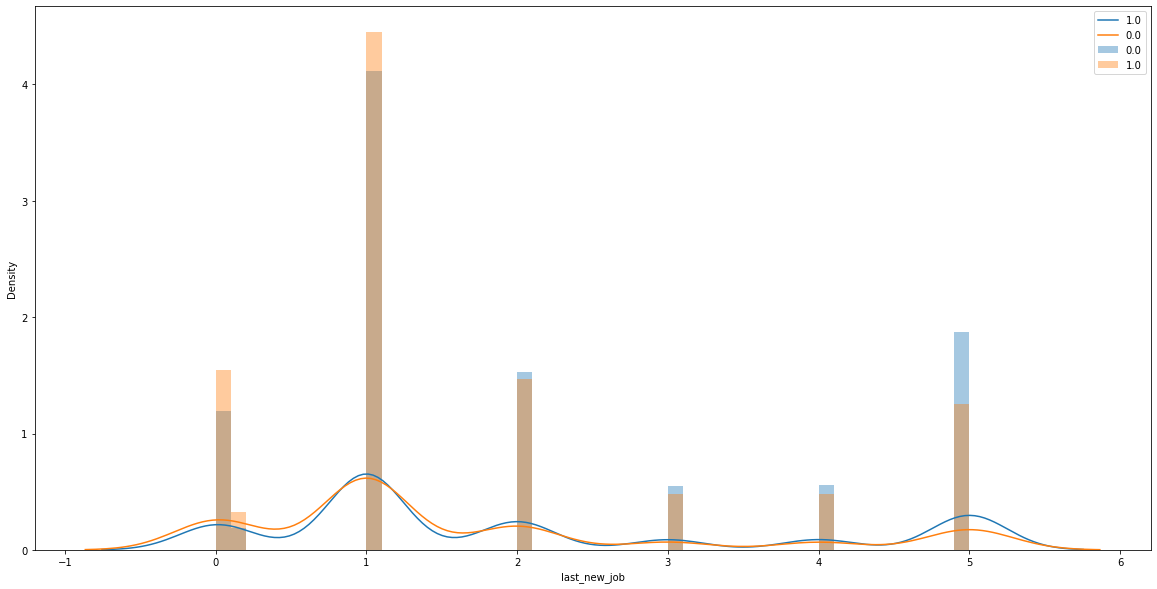

In [21]:
def replace(last_new_job):
    if last_new_job == '>4':
        return 5
    elif last_new_job == 'never':
        return 0
    else:
        return last_new_job

train2.last_new_job = train2.last_new_job.map(replace)
train2['last_new_job'] = train2['last_new_job'].astype(float)
train2.last_new_job = train2.last_new_job.replace(9999,0.1)

plt.figure(figsize= (20,10))
sns.distplot(train2[train2.target == 0].last_new_job, bins = 50)
sns.distplot(train2[train2.target == 1].last_new_job, bins = 50)

plt.legend(train2.target)

plt.show()